#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

**Инструкция по выполнению проекта**

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Тренд,-сезонность-и-шум" data-toc-modified-id="Тренд,-сезонность-и-шум-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренд, сезонность и шум</a></span></li><li><span><a href="#Стационарность" data-toc-modified-id="Стационарность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Стационарность</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Добавим-признаки" data-toc-modified-id="Добавим-признаки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавим признаки</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#RMSE" data-toc-modified-id="RMSE-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RMSE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Регрессия-Ridge" data-toc-modified-id="Регрессия-Ridge-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Регрессия Ridge</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Light-GBM" data-toc-modified-id="Light-GBM-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Light GBM</a></span></li></ul></li><li><span><a href="#Итоги-обучения" data-toc-modified-id="Итоги-обучения-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Итоги обучения</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Регрессия-Ridge" data-toc-modified-id="Регрессия-Ridge-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Регрессия Ridge</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Cлучайный-лес" data-toc-modified-id="Cлучайный-лес-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Cлучайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Итоги-тестирования" data-toc-modified-id="Итоги-тестирования-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Итоги тестирования</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None) #реализуем возможность вывода всех столбцов на экран
pd.set_option('display.float_format', '{:.3f}'.format) #выводим значения float до 3 знаков после запятой

from sklearn.model_selection import RandomizedSearchCV

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import time
import statsmodels.api as sm

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

import warnings
warnings.filterwarnings('ignore')

## Подготовка

In [4]:
# загрузим данные
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

Проверим данные на монотонность.

In [5]:
print(data.index.is_monotonic)

True


Ресемплируем временной ряд по часам

In [6]:
# ресемплируем временной ряд по часам
data = data.resample('1H').sum()

In [7]:
data

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


**Выводы:**

Пропусков в данных нет. Временной ряд монотонен и. Предобработка данных не требуется. 

## Анализ

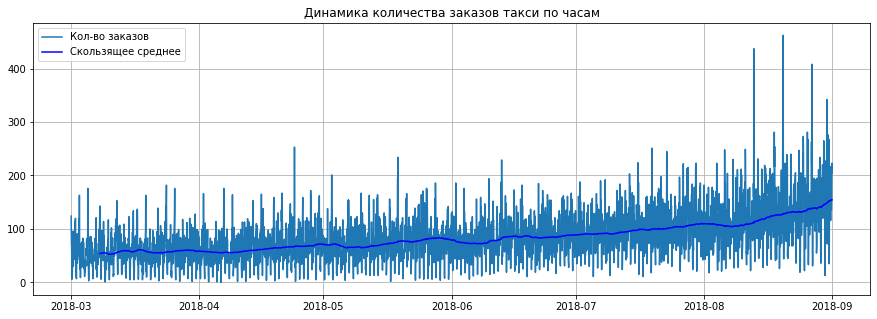

In [9]:
rolling_mean = data.rolling(24*7).mean()

plt.figure(figsize=(15,5))
plt.title("Динамика количества заказов такси по часам")

plt.plot(data, label="Кол-во заказов")
plt.plot(rolling_mean, "g", label="Скользящее среднее", color='blue')
plt.legend(loc="upper left")
plt.grid(True)

Благодаря скользящему среднему с размером окна в 1 неделю мы видим, что происходит непрерывный рост количества заказов такси. Возможно, данные по заказам такси  из города, где имеется прирост населения, улучшение популярности сервиса такси, увеличение числа туристов. Как бы там ни было, тренд сам по себе на даст нам ответа на этот вопрос.

### Тренд, сезонность и шум

Посмотрим тренд, сезонность и шум.

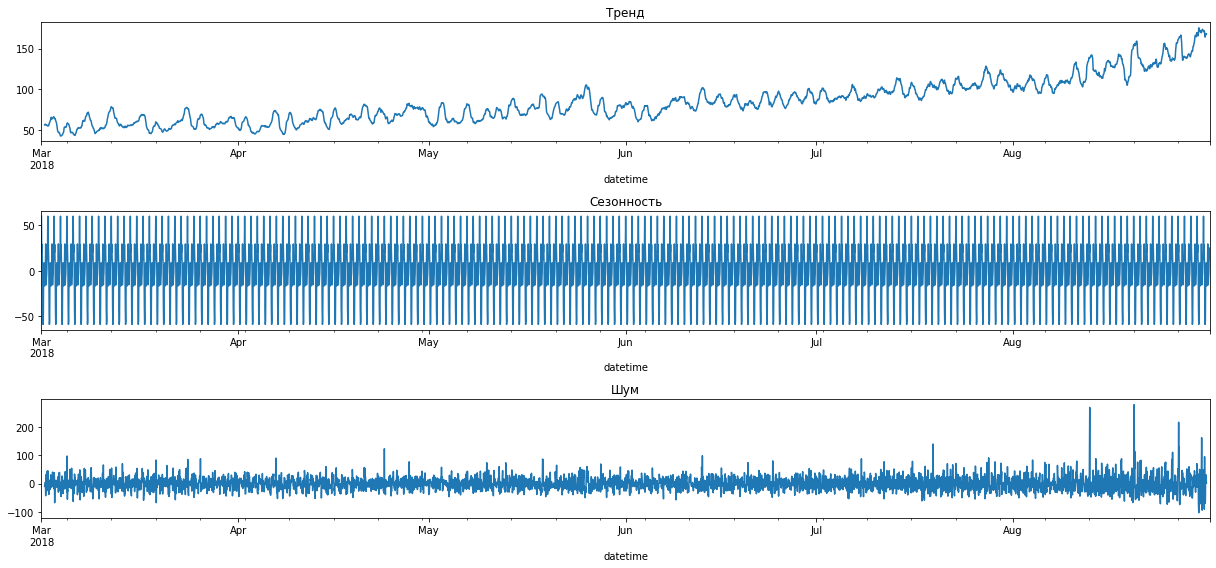

In [10]:
decomposed = seasonal_decompose(data) 

plt.figure(figsize=(17, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Шум')
plt.tight_layout()

### Стационарность

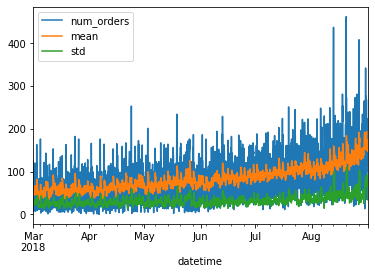

In [11]:
data['mean'] = data['num_orders'].rolling(15).mean()
data['std'] = data['num_orders'].rolling(15).std()
data.plot()
plt.show()

Удалим лишние столбцы.

In [12]:
data = data.drop(['mean', 'std'], axis=1)

Проверим, можно ли назвать наш график стационарным, для этого используем тест Дики-Фуллера.

In [13]:
p_value = adfuller(data['num_orders'])[1]
print('P =', p_value)
if p_value < 0.05:
    print('Нулевая гипотеза отвергается. Ряд стационарен по критерию Дики-Фуллера')
else:
    print('Нулевая гипотеза не отвергается. Ряд нестационарен по критерию Дики-Фуллера')

P = 0.028940051402612906
Нулевая гипотеза отвергается. Ряд стационарен по критерию Дики-Фуллера


In [14]:
# тест Дики-Фуллера
test_df = sm.tsa.stattools.adfuller(data['num_orders'])[1]
# округлим резульиат
test_df = round(test_df, 3)
# выведем значение на экран
print('p-value гипотизы о нестационарности временного ряда составил', test_df)

p-value гипотизы о нестационарности временного ряда составил 0.029


В качестве критерия значимости примем 5 %, поэтому будем считать график стационарным.

**Выводы:** Временной ряд стационарен/ Также был выделен тренд имеющий возрастающую зависимость от времени и сезонность по дням.

## Обучение

 Переходим к подготовке выборок и обучению моделей.
 
 ### Добавим признаки
 
 создадим функцию и добавим календарные и прочие признаки.

In [15]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
make_features(data, 2, 24)
data

,num_orders,hour,dayofweek,lag_1,lag_2,rolling_mean
datetime,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.000,NaN,NaN
2018-03-01 02:00:00,71,2,3,85.000,124.000,NaN
2018-03-01 03:00:00,66,3,3,71.000,85.000,NaN
2018-03-01 04:00:00,43,4,3,66.000,71.000,NaN
...,...,...,...,...,...,...
2018-08-31 19:00:00,136,19,4,207.000,217.000,164.875
2018-08-31 20:00:00,154,20,4,136.000,207.000,167.542
2018-08-31 21:00:00,159,21,4,154.000,136.000,168.042


 ### Разделение на выборки

In [16]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

Разделим признаки и целевой признак.

In [17]:
train_features = train.drop(['num_orders'], axis=1)
train_target = train['num_orders']
test_features = test.drop(['num_orders'], axis=1)
test_target = test['num_orders']

### RMSE

Создадим функцию для вычисления метрики RMSE. Далее она будет использована при подборе гиперпраметров.

In [18]:
def rmse_score (target, predictions):
    rmse = mean_squared_error(target, predictions)**0.5
    return rmse
scorer = make_scorer(rmse_score, greater_is_better=False)

### Обучение моделей

Переходим к обучению различных моделей. 
Проверим действие 5-и моделей: 
- линейная регрессия;
- регрессия Ridge;
- решающее дерево;
- случайный лес;
- LightGBM.

In [19]:
models_names = ['Ллинейная регрессия','Регрессия Ridge','Решающее дерево','Случайный лес','LightGBM']
best_scores = []

Поиск гиперпараметров будем проводить с помощью метода RandoSearchCV и метода TimeSeriesSplit.

In [20]:
tscv = TimeSeriesSplit(n_splits=8)

#### Линейная регрессия

In [21]:
''''model = LinearRegression()
parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False]
             }
grid = RandomizedSearchCV(model, parameters, cv=tscv, scoring=scorer, verbose=5, n_jobs=-1)
grid.fit(train_features, train_target)
print("RMSE линейной регрессии составляет ", -grid.best_score_)
print('Наилучшие подобранные параметры для линейной регрессии')
best_scores.append(-grid.best_score_)
linear_best_params = grid.best_params_
grid.best_params_'''

Fitting 8 folds for each of 4 candidates, totalling 32 fits
[CV 1/8] END .............fit_intercept=True, normalize=True; total time=   0.0s
[CV 2/8] END .............fit_intercept=True, normalize=True; total time=   0.0s
[CV 3/8] END .............fit_intercept=True, normalize=True; total time=   0.0s
[CV 4/8] END .............fit_intercept=True, normalize=True; total time=   0.0s
[CV 5/8] END .............fit_intercept=True, normalize=True; total time=   0.0s
[CV 6/8] END .............fit_intercept=True, normalize=True; total time=   0.0s
[CV 7/8] END .............fit_intercept=True, normalize=True; total time=   0.0s
[CV 8/8] END .............fit_intercept=True, normalize=True; total time=   0.0s
[CV 1/8] END ............fit_intercept=True, normalize=False; total time=   0.0s
[CV 2/8] END ............fit_intercept=True, normalize=False; total time=   0.0s
[CV 3/8] END ............fit_intercept=True, normalize=False; total time=   0.0s
[CV 4/8] END ............fit_intercept=True, norm

{'normalize': True, 'fit_intercept': False}

Наилучший RMSE `31.35` получен для параметров: 

- `normalize`: True, 
- `fit_intercept`: False

**Код выше закоментирован, чтобы не выполнялся снова при перезапуске тетрадки.**

#### Регрессия Ridge


In [22]:
ridge = Ridge()
parameters = [{'alpha':[0.1, 1, 10, 100, 1000],
                'solver':['auto', 'svd', 'cholesky', 'lsqr','sparse_cg']}]

grid = RandomizedSearchCV(ridge, parameters, cv=tscv, scoring=scorer, verbose=5, n_jobs=-1)

grid.fit(train_features, train_target)

print("RMSE регрессии Ridge составляет ", -grid.best_score_)
print('Наилучшие подобранные параметры для линейной регрессии')
best_scores.append(-grid.best_score_)
ridge_best_params = grid.best_params_
grid.best_params_

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[CV 1/8] END ...........................alpha=10, solver=svd; total time=   0.0s
[CV 2/8] END ...........................alpha=10, solver=svd; total time=   0.0s
[CV 3/8] END ...........................alpha=10, solver=svd; total time=   0.0s
[CV 4/8] END ...........................alpha=10, solver=svd; total time=   0.0s
[CV 5/8] END ...........................alpha=10, solver=svd; total time=   0.0s
[CV 6/8] END ...........................alpha=10, solver=svd; total time=   0.0s
[CV 7/8] END ...........................alpha=10, solver=svd; total time=   0.0s
[CV 8/8] END ...........................alpha=10, solver=svd; total time=   0.0s
[CV 1/8] END .....................alpha=100, solver=cholesky; total time=   0.0s
[CV 2/8] END .....................alpha=100, solver=cholesky; total time=   0.0s
[CV 3/8] END .....................alpha=100, solver=cholesky; total time=   0.1s
[CV 4/8] END .....................alpha=100, sol

{'solver': 'lsqr', 'alpha': 100}

Наилучший RMSE `31.40` получен для параметров:

- 'solver': 'lsqr', 
- 'alpha': 0.1

**Код выше закоментирован, чтобы не выполнялся снова при перезапуске тетрадки.**

#### Дерево решений

In [23]:
tree = DecisionTreeRegressor(random_state=12345)
    
tree_params = {'max_depth': range(1,15),
              'min_samples_split': range(2,7)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, verbose=5, scoring=scorer)

tree_grid.fit(train_features, train_target)

print("RMSE для решающего дерева составляет ", -tree_grid.best_score_)
print('Наилучшие подобранные параметры для решающего дерева')
best_scores.append(-tree_grid.best_score_)
tree_best_params = tree_grid.best_params_
print(tree_grid.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ...............max_depth=1, min_samples_split=2; total time=   0.0s
[CV 2/5] END ...............max_depth=1, min_samples_split=2; total time=   0.0s
[CV 3/5] END ...............max_depth=1, min_samples_split=2; total time=   0.0s
[CV 4/5] END ...............max_depth=1, min_samples_split=2; total time=   0.0s
[CV 5/5] END ...............max_depth=1, min_samples_split=2; total time=   0.0s
[CV 1/5] END ...............max_depth=1, min_samples_split=3; total time=   0.0s
[CV 2/5] END ...............max_depth=1, min_samples_split=3; total time=   0.0s
[CV 3/5] END ...............max_depth=1, min_samples_split=3; total time=   0.0s
[CV 4/5] END ...............max_depth=1, min_samples_split=3; total time=   0.0s
[CV 5/5] END ...............max_depth=1, min_samples_split=3; total time=   0.0s
[CV 1/5] END ...............max_depth=1, min_samples_split=4; total time=   0.0s
[CV 2/5] END ...............max_depth=1, min_sa

Наилучший RMSE 27.49 для решающего дерева леса получен для параметров: 
- 'max_depth': 6, 
- 'min_samples_split': 4. 

**Код выше закоментирован, чтобы не выполнялся снова при перезапуске тетрадки.**

#### Случайный лес

In [24]:
# создадим модель
forest = RandomForestRegressor(random_state=12345)

# установим диапазоны параметров
forest_params = {'n_estimators': range(30, 151, 10),
                 'max_depth': range(1,15)}

forest_grid = RandomizedSearchCV(forest, forest_params, cv=tscv, scoring=scorer, verbose=5, n_jobs=-1)

# проведём подбор параметров
forest_grid.fit(train_features, train_target)

print("RMSE для случайного леса составляет ", -forest_grid.best_score_)

print('Наилучшие подобранные параметры для случайного леса')
best_scores.append(-forest_grid.best_score_)
forest_best_params = forest_grid.best_params_
print(forest_grid.best_params_)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[CV 1/8] END ...................max_depth=4, n_estimators=50; total time=   0.1s
[CV 2/8] END ...................max_depth=4, n_estimators=50; total time=   0.1s
[CV 3/8] END ...................max_depth=4, n_estimators=50; total time=   0.1s
[CV 4/8] END ...................max_depth=4, n_estimators=50; total time=   0.1s
[CV 5/8] END ...................max_depth=4, n_estimators=50; total time=   0.1s
[CV 6/8] END ...................max_depth=4, n_estimators=50; total time=   0.1s
[CV 7/8] END ...................max_depth=4, n_estimators=50; total time=   0.2s
[CV 8/8] END ...................max_depth=4, n_estimators=50; total time=   0.2s
[CV 1/8] END ...................max_depth=8, n_estimators=30; total time=   0.1s
[CV 2/8] END ...................max_depth=8, n_estimators=30; total time=   0.1s
[CV 3/8] END ...................max_depth=8, n_estimators=30; total time=   0.1s
[CV 4/8] END ...................max_depth=8, n_e

Наилучший RMSE 24.59 для случайного леса получен для параметров: 
- 'max_depth': 14, 
- 'n_estimators': 150. 

**Код выше закоментирован, чтобы не выполнялся снова при перезапуске тетрадки.**

#### Light GBM

In [25]:
gbm = LGBMRegressor(random_state=12345)
    
g_params = {'n_estimators': [50, 100, 500],
              'num_leaves': [21, 31, 41], 
              'learning_rate':[0.01, .04, 0.06]}

g_grid = RandomizedSearchCV(gbm, g_params,
                         cv=tscv, verbose=5, scoring=scorer)

g_grid.fit(train_features, train_target)

print("RMSE для LGBM составляет ", -g_grid.best_score_)

print('Наилучшие подобранные параметры для LGBM')
best_scores.append(-g_grid.best_score_)
g_best_params = g_grid.best_params_
print(g_grid.best_params_)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[CV 1/8] END learning_rate=0.01, n_estimators=500, num_leaves=31; total time=  12.7s
[CV 2/8] END learning_rate=0.01, n_estimators=500, num_leaves=31; total time=   8.0s
[CV 3/8] END learning_rate=0.01, n_estimators=500, num_leaves=31; total time=  13.3s
[CV 4/8] END learning_rate=0.01, n_estimators=500, num_leaves=31; total time=  15.7s
[CV 5/8] END learning_rate=0.01, n_estimators=500, num_leaves=31; total time=  20.1s
[CV 6/8] END learning_rate=0.01, n_estimators=500, num_leaves=31; total time=  10.8s
[CV 7/8] END learning_rate=0.01, n_estimators=500, num_leaves=31; total time=  15.2s
[CV 8/8] END learning_rate=0.01, n_estimators=500, num_leaves=31; total time= 6.5min
[CV 1/8] END learning_rate=0.01, n_estimators=50, num_leaves=21; total time= 1.2min
[CV 2/8] END learning_rate=0.01, n_estimators=50, num_leaves=21; total time= 1.3min
[CV 3/8] END learning_rate=0.01, n_estimators=50, num_leaves=21; total time= 1.5min
[CV 4/8

Наилучший RMSE **24.39** для LGBM получен для параметров: 

- 'num_leaves': 21;
- 'n_estimators': 100;
- 'learning_rate': 0.06;

**Код выше закоментирован, чтобы не выполнялся снова при перезапуске тетрадки.**

### Итоги обучения

Обучены и подобраны гиперпараметры для пяти различных моделей: линейная регрессия, регрессии ridge, решающее дерево, случайный лес, LightGBM. Для всех моделей была применена кросс-валидация с применением метода TimeSeriesSplit.

In [26]:
# создадим таблицу для хранения результатов
scores_data = {'Модель': models_names, 'Лучшее RMSE': best_scores}
train_results = pd.DataFrame(data=scores_data)
train_results

,Модель,Лучшее RMSE
0,Ллинейная регрессия,31.360
1,Регрессия Ridge,31.398
2,Решающее дерево,27.496
3,Случайный лес,24.596
4,LightGBM,24.360


**Выводы:**

Целевое значение метрики RMSE (<48) достигнуты всеми 4-мя моделями. Наихудший результат был получен с ппомощью регрессии Ridge (31.39), наилучший - с помощью **LGBM** (**24.39**). Проверим модели с подобранными гиперпараметрами на тестовой выборке.

## Тестирование

### Подготовка

Создадим несколько функций и переменных

In [27]:
# создадим таблицу для хранения результатов
d = {'model': [], 'RMSE':[], 'fit_time': [], 'predict_time':[]}
results = pd.DataFrame(data=d)
results

,model,RMSE,fit_time,predict_time


In [28]:
# создадим функцию для добавления результатов в таблицу
def model_res(model_name, model, features_train, target_train, features_test, target_test):
    rmse, fit_time, pred_time = ml(model, features_train, target_train, features_test, target_test)
    results.loc[len(results)] = [model_name, rmse, fit_time, pred_time]
    if len(results) > 0: # исключим дублировании при неоднократном выполнении функции для одной и той же модели
        results.drop_duplicates(inplace=True)

In [29]:
# cоздадим функцию для расчета необходимых параметров
def ml(model, features_train, target_train, features_test, target_test):
    start_fit_time = time.time()
    model.fit(features_train, target_train)
    stop_fit_time = time.time()
    
    fit_time = stop_fit_time - start_fit_time
    
    start_predict_time = time.time()
    predictions = model.predict(features_test)
    
    stop_predict_time = time.time()
    
    pred_time = stop_predict_time - start_predict_time
    
    rmse = mean_squared_error(target_test, predictions)**0.5
    
    return rmse, fit_time, pred_time

In [30]:
# создадим функцию для вывода графиков
def plot_test (model, model_name):
    plt.figure(figsize=(15,5))
    plt.title("Сравнение реальных значений и предсказанных с помощью модели " + model_name)
    plt.plot(test_target, label='Test values')
    predictions = model.predict(test_features)
    predictions = pd.Series(predictions, index=test_target.index)
    plt.plot(predictions, label ='Prediction values')
    plt.legend(loc="upper left")
    plt.grid(True)

###  Тестирование моделей

#### Линейная регрессия

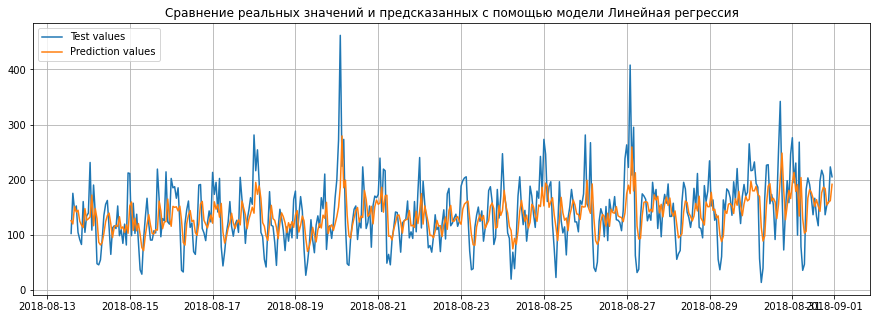

In [31]:
# линейная регрессия
linear = LinearRegression(fit_intercept=linear_best_params['fit_intercept'], normalize=linear_best_params['normalize'])
model_res('Линейная регрессия', linear, train_features, train_target, test_features, test_target)
plot_test(linear, 'Линейная регрессия')

#### Регрессия Ridge

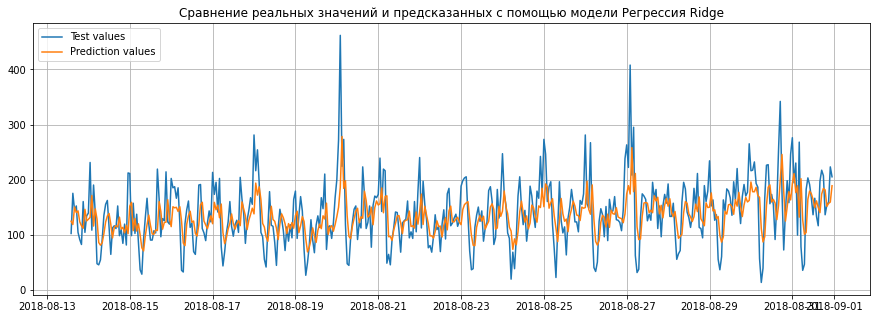

In [32]:
# регрессия ridge
ridge = Ridge(solver=ridge_best_params['solver'], alpha=ridge_best_params['alpha'])
model_res('Регрессия Ridge', ridge, train_features, train_target, test_features, test_target)
plot_test(ridge, 'Регрессия Ridge')

#### Решающее дерево

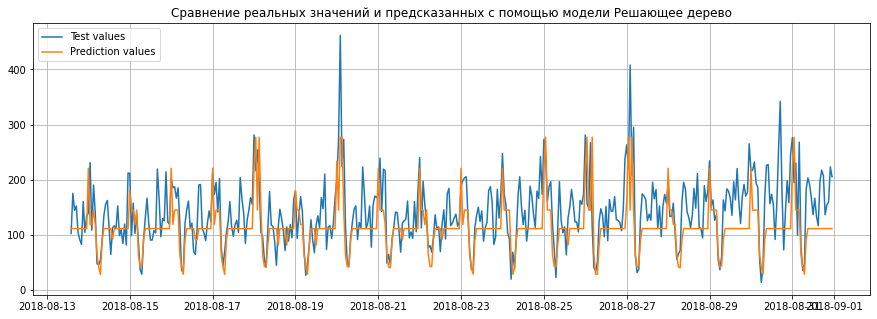

In [33]:
# решающее дерево
tree = DecisionTreeRegressor(random_state=12345, max_depth=tree_best_params['max_depth'], min_samples_split=tree_best_params['min_samples_split'])
model_res('Решающее дерево', tree, train_features, train_target, test_features, test_target)
plot_test(tree, 'Решающее дерево')

#### Cлучайный лес

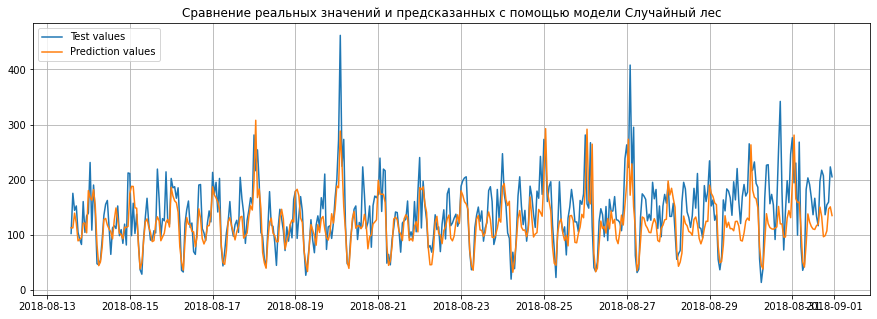

In [34]:
# случайный лес
forest = RandomForestRegressor(max_depth=forest_best_params['max_depth'], n_estimators=forest_best_params['n_estimators'], random_state=12345)
model_res('Cлучайный лес', forest, train_features, train_target, test_features, test_target)
plot_test(forest, 'Cлучайный лес')

#### LightGBM

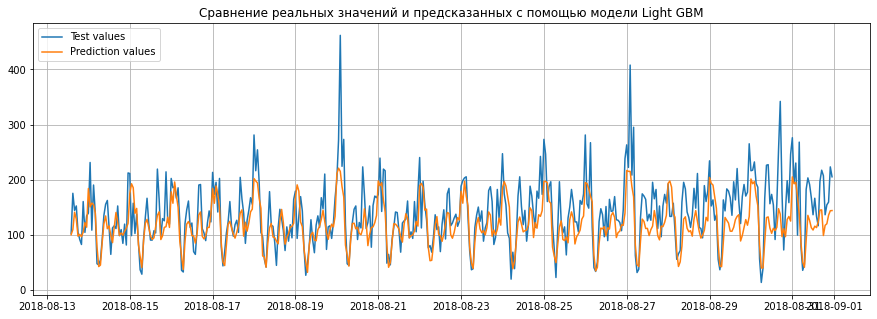

In [35]:
# Light GBM
lgbm = LGBMRegressor(learning_rate=g_best_params['learning_rate'], n_estimators=g_best_params['n_estimators'], num_leaves=g_best_params['num_leaves'], random_state=12345)
model_res('Light GBM', lgbm, train_features, train_target, test_features, test_target)
plot_test(lgbm, 'Light GBM')

### Итоги тестирования

In [36]:
display(results)

,model,RMSE,fit_time,predict_time
0,Линейная регрессия,51.192,0.003,0.002
1,Регрессия Ridge,51.267,0.008,0.002
2,Решающее дерево,52.757,0.008,0.001
3,Cлучайный лес,46.820,1.204,0.017
4,Light GBM,44.954,59.995,0.096


**Вывод**

По итогу тестирования все модели, кроме Light GBM, не подошли под требование по поставленной метрике (RMSE < 48). Каждая модель оказалась переобученной (или недообученной), т.к. результаты на тестовой выборке ухудшились почти в 1.5 раза для каждой модели по сравнению с обучающей.

С лучшими по итогу параметрами (метрика + скорость обучения) оказался Light GBM. Данную модель и подобранные ей гиперпараметры принимаем за основную и передаем заказчику для предсказания заказов такси в следующий час.

**Заключительнве выводы:**

1. Пропусков в данных нет. Временной ряд монотонен и. Предобработка данных не требуется. 

2. Временной ряд стационарен/ Также был выделен тренд имеющий возрастающую зависимость от времени и сезонность по дням.

3. Целевое значение метрики RMSE (<48) достигнуты всеми 4-мя моделями. Наихудший результат был получен с ппомощью регрессии Ridge (31.39), наилучший - с помощью **LGBM** (**24.39**). Проверим модели с подобранными гиперпараметрами на тестовой выборке.

3. По итогу тестирования все модели, кроме Light GBM, не подошли под требование по поставленной метрике (RMSE < 48). Каждая модель оказалась переобученной (или недообученной), т.к. результаты на тестовой выборке ухудшились почти в 1.5 раза для каждой модели по сравнению с обучающей.
С лучшими по итогу параметрами (метрика + скорость обучения) оказался Light GBM. Данную модель и подобранные ей гиперпараметры принимаем за основную и передаем заказчику для предсказания заказов такси в следующий час.